In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 200
X = np.linspace(-2, 2, N).reshape((N,1))
y = X**4 - 3*X**2 + X - 4

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:
def create_model(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    return model

In [5]:
predictions = []
for degree in [1,3,6,9]:
    model = create_model(degree)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    predictions.append(predicted)
    print("d={}, c={}, c0={}, z={}".format(degree, model.steps[1][1].coef_, model.steps[1][1].intercept_, model.score(X_test, y_test)))

d=1, c=[[0.         1.01399347]], c0=[-4.7717472], z=0.4740480053181947
d=3, c=[[ 0.          1.02580559  0.52043006 -0.00970367]], c0=[-5.4893988], z=0.48799883916959563
d=6, c=[[ 0.00000000e+00  1.00000000e+00 -3.00000000e+00 -1.29757316e-15
   1.00000000e+00  2.06432094e-16 -3.33066907e-16]], c0=[-4.], z=1.0
d=9, c=[[ 0.00000000e+00  1.00000000e+00 -3.00000000e+00 -1.52581940e-14
   1.00000000e+00  6.77084257e-15  8.43769499e-15  1.66533454e-16
  -6.66133815e-16 -5.53376789e-16]], c0=[-4.], z=1.0


In [6]:
predictions = np.concatenate(predictions, axis=1)

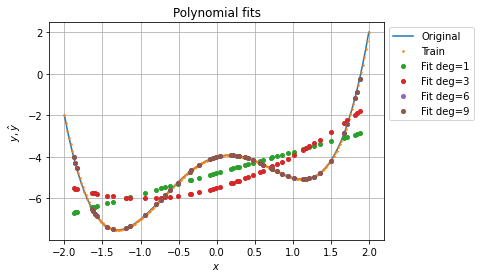

In [8]:
fig, axe = plt.subplots()
axe.plot(X, y)
axe.plot(X_train, y_train, '.', markersize=3)
axe.plot(X_test, predictions, 'o', markersize=4)
axe.legend(['Original', 'Train', 'Fit deg=1', 'Fit deg=3', 'Fit deg=6', 'Fit deg=9'], bbox_to_anchor=(1,1))
axe.set_title("Polynomial fits")
axe.set_xlabel("$x$")
axe.set_ylabel("$y, \hat{y}$")
axe.grid()